In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
p = sns.color_palette()

USE_SAMPLE = True
TRAIN_FACE = './sample/train_face.txt' if USE_SAMPLE else './data/train_face.txt'
TRAIN_USER_INTERACT = './sample/train_interaction.txt' if USE_SAMPLE else './data/train_interaction.txt'
TRAIN_TEXT = './sample/train_text.txt' if USE_SAMPLE else './data/train_text.txt'
TEST_FACE = './sample/test_face.txt' if USE_SAMPLE else './data/test_face.txt'
TEST_INTERACT = './sample/test_interaction.txt' if USE_SAMPLE else './data/test_interaction.txt'
TEST_TEXT = './sample/test_text.txt' if USE_SAMPLE else './data/test_text.txt'

feature_store_path = '../sample/features' if USE_SAMPLE else '../data/features'
col_feature_store_path = '../sample/features/columns' if USE_SAMPLE else './data/features/columns'

In [2]:
def plot_data_cut(df, col, n_bins=20):
    quartiles = pd.cut(df[col], n_bins)
    grouped = df.groupby(quartiles)
    
    plt.figure(figsize=(30,15)) 
    plt.xlabel(col)
    plt.ylabel('counts in ' + col)
    nums_of_col = grouped.size()
    nums_of_col.plot.bar()

In [2]:
users = pd.read_csv(os.path.join(feature_store_path, 'user_feature.csv'), sep='\t')

In [3]:
users.head()

,user_id,browse_num,click_num,like_num,follow_num,playing_sum,duration_sum,click_ratio,like_ratio,follow_ratio,...,woman_favor,man_cv_favor,woman_cv_favor,man_age_favor,woman_age_favor,man_yen_value_favor,woman_yen_value_favor,face_click_favor,non_face_click_favor,cover_length_favor
0,1637,1736,365,4,0,4124,27726,0.210539,0.002304,0.000000,...,0.605479,0.014004,0.028724,7.516667,11.586758,15.523516,27.644749,0.649315,0.350685,6.463014
1,17470,477,82,0,1,1937,8586,0.173687,0.000000,0.002096,...,0.158537,0.006262,0.014798,5.912602,3.987805,10.439024,10.829268,0.341463,0.658537,2.817073
2,14148,852,139,2,1,1120,16928,0.164248,0.002347,0.001174,...,0.525180,0.008571,0.051771,4.125899,10.139688,7.700000,25.859712,0.525180,0.474820,3.187050
3,37431,355,128,4,1,2548,8752,0.357969,0.011268,0.002817,...,0.257812,0.012066,0.018660,4.979167,5.050781,8.635417,14.738281,0.359375,0.640625,4.218750
4,35273,2486,576,0,1,7228,35415,0.231814,0.000000,0.000402,...,0.164931,0.007851,0.011083,4.123264,3.647569,7.314959,9.075087,0.284722,0.715278,3.399306


In [4]:
photos = pd.read_csv(os.path.join(feature_store_path, 'photo_feature.csv'), sep='\t')

In [5]:
photos.head()

,photo_id,exposure_num,clicked_ratio,face_num,man_num,woman_num,man_scale,woman_scale,human_scale,man_avg_age,woman_avg_age,human_avg_age,man_avg_attr,woman_avg_attr,human_avg_attr,cover_length,key_words_num,avg_tfidf,have_face_cate
0,6484142,13,0.268404,0.0,0.0,0.0,0.0000,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2,2,0.000006,False
1,4647664,2,0.210489,0.0,0.0,0.0,0.0000,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,8,7,0.000011,False
2,4994626,34,0.235732,3.0,3.0,0.0,0.3959,0.0,0.3959,26.333333,0.0,26.333333,48.333333,0.0,48.333333,3,0,0.000007,True
3,4416881,1,0.164285,0.0,0.0,0.0,0.0000,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0,0,0.000000,False
4,2597756,2,0.155202,0.0,0.0,0.0,0.0000,0.0,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0,0,0.000000,False


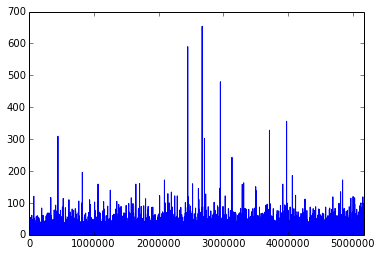

In [17]:
photos.key_words_num.plot()

In [18]:
photos.key_words_num.describe()

count    5.174532e+06
mean     1.654426e+00
std      2.924251e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e+00
max      6.540000e+02
Name: key_words_num, dtype: float64

In [13]:
photos[photos['key_words_num']==0].shape

(2905745, 19)

In [14]:
photos[photos['key_words_num']==1].shape

(441468, 19)

In [15]:
photos[photos['key_words_num']==2].shape

(487827, 19)

In [16]:
photos[photos['key_words_num']==3].shape

(403247, 19)

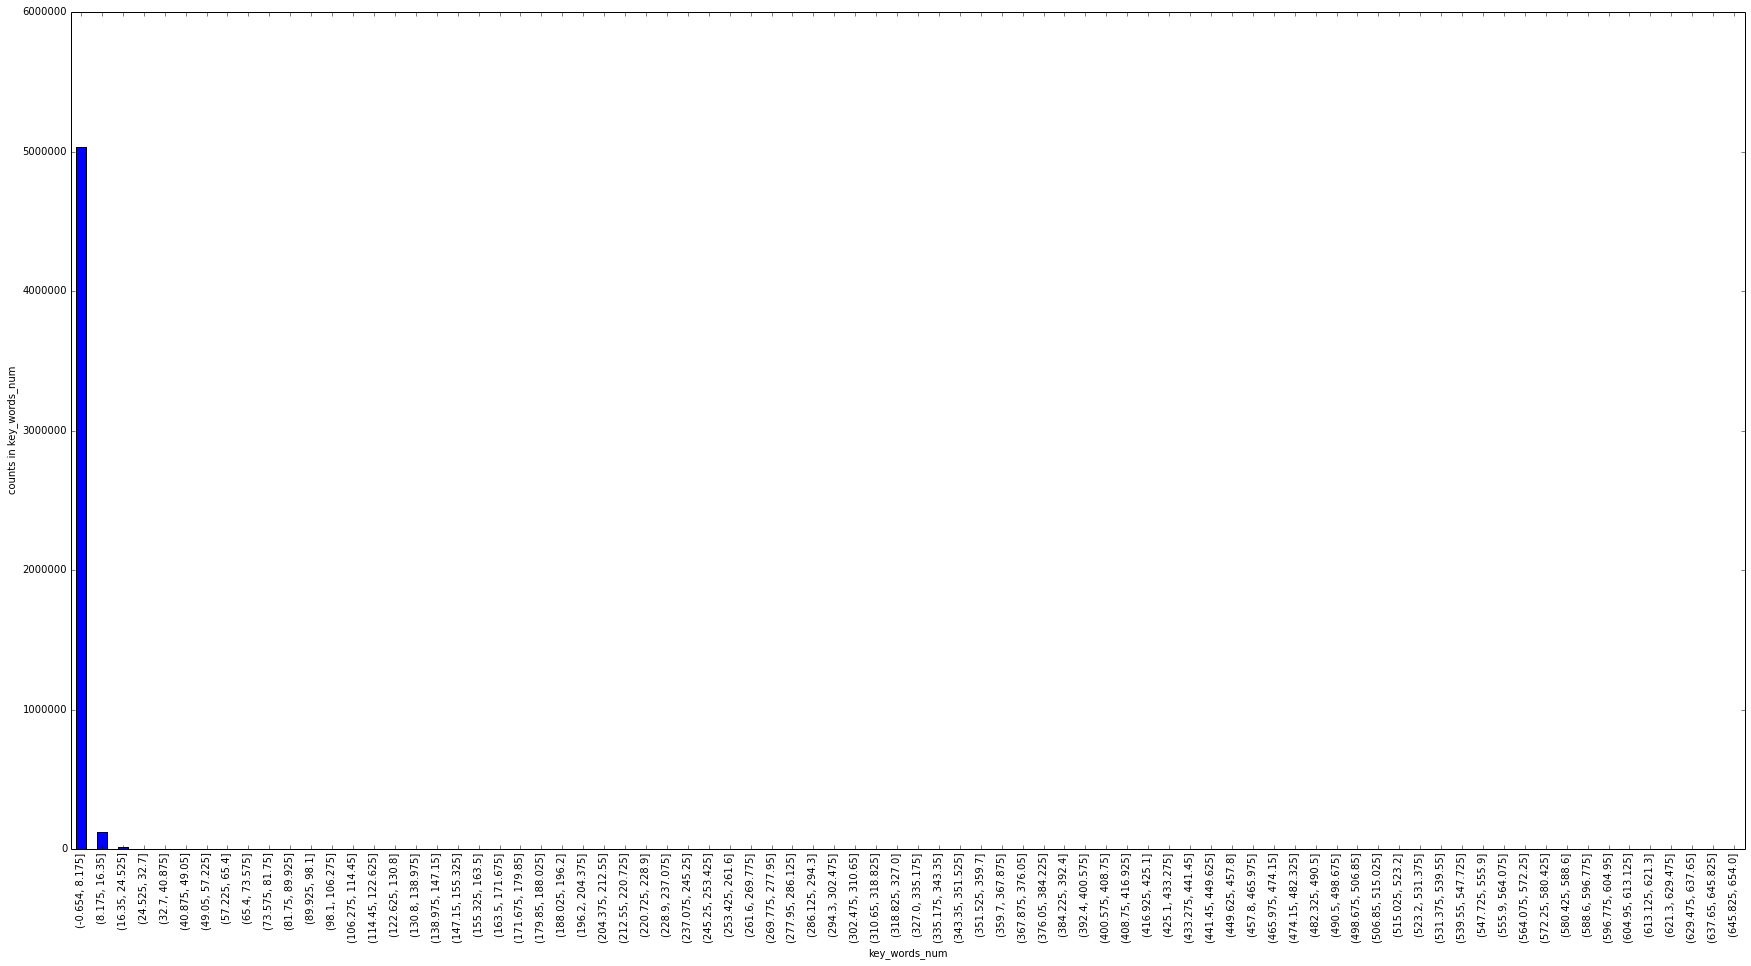

In [10]:
plot_data_cut(photos, 'key_words_num', 80)

In [19]:
photos.avg_tfidf.describe()

count    5.174532e+06
mean     4.026147e-06
std      4.512722e-06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.901608e-06
max      6.025856e-05
Name: avg_tfidf, dtype: float64

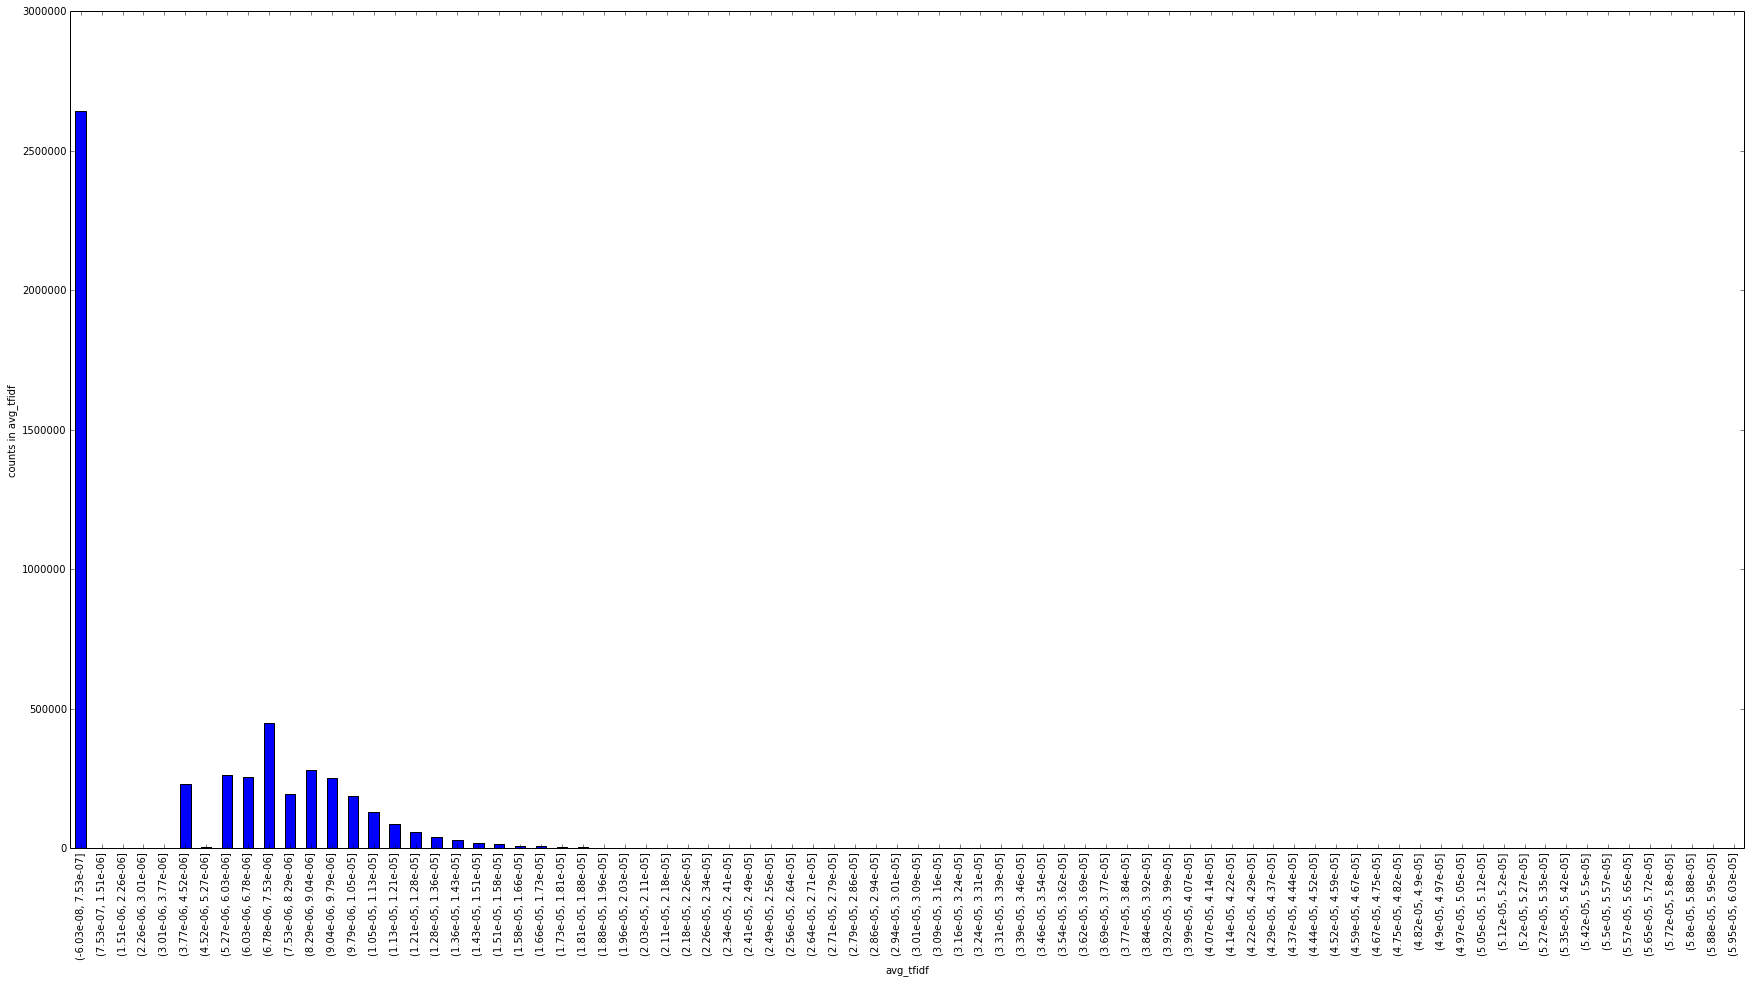

In [11]:
plot_data_cut(photos, 'avg_tfidf', 80)

In [15]:
train = pd.read_csv(os.path.join(feature_store_path, 'ensemble_feature_train_sample.csv'), sep='\t')

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120901 entries, 0 to 3120900
Data columns (total 50 columns):
user_id                  int64
photo_id                 int64
browse_num               int64
click_num                int64
like_num                 int64
follow_num               int64
playing_sum              int64
duration_sum             int64
click_ratio              float64
like_ratio               float64
follow_ratio             float64
playing_ratio            float64
browse_time_diff         int64
click_freq               float64
browse_freq              float64
playing_freq             float64
man_favor                float64
woman_favor              float64
man_cv_favor             float64
woman_cv_favor           float64
man_age_favor            float64
woman_age_favor          float64
man_yen_value_favor      float64
woman_yen_value_favor    float64
face_click_favor         float64
non_face_click_favor     float64
cover_length_favor       float64
exposure_num  

In [17]:
train.head()

,user_id,photo_id,browse_num,click_num,like_num,follow_num,playing_sum,duration_sum,click_ratio,like_ratio,...,woman_avg_attr,human_avg_attr,woman_num_ratio,man_num_ratio,cover_length,avg_tfidf,key_words_num,time,duration_time,click
0,2,528031,304,50,0,3,1015,6088,0.167463,0.0,...,66.0,66.0,1.0,0.0,13,0.000024,11,761073153303,16,0
1,2,3141045,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,5,0.000017,5,761073449279,10,0
2,2,6410672,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,2,0.000011,0,761072688657,13,0
3,2,6031965,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,4,0.000016,1,761079542559,11,0
4,2,492513,304,50,0,3,1015,6088,0.167463,0.0,...,0.0,0.0,0.0,0.0,0,0.000000,0,761071781792,11,0


In [18]:
test = pd.read_csv(os.path.join(feature_store_path, 'ensemble_feature_test_sample.csv'), sep='\t')

In [22]:
period_click_ratio_test = pd.read_csv(os.path.join(col_feature_store_path, 'period_click_ratio_test.csv'), sep='\t')

In [27]:
np.sum(period_click_ratio_test.isnull())

user_id               0
photo_id              0
period_click_ratio    0
dtype: int64